In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
all_power_plants = pd.read_csv('all_types_coal_plants.csv', index_col=['State'])

delivered_cost_of_coal = all_power_plants['INR/Mcal'] * 0.012 / 0.00396

delivered_cost_of_coal = delivered_cost_of_coal.groupby(delivered_cost_of_coal.index).mean()

print(delivered_cost_of_coal)

print(max(delivered_cost_of_coal), min(delivered_cost_of_coal))

State
Andhra Pradesh    3.428803
Assam             2.927109
Bihar             1.872935
Chhattisgarh      1.590009
Gujarat           3.698583
Haryana           3.236799
Jharkhand         1.590523
Karnataka         3.463825
Madhya Pradesh    1.724749
Maharashtra       2.376427
Odisha            1.658481
Punjab            3.772684
Rajasthan         2.797601
Tamil Nadu        3.899895
Telangana         2.035120
Uttar Pradesh     2.043930
West Bengal       1.986267
Name: INR/Mcal, dtype: float64
3.8998950481863397 1.5900090851893383


In [3]:
State_name = ['Bihar', 'Jharkhand', 'Odisha',
              'Sikkim', 'West Bengal', 'Arunachal Pradesh',
              'Assam', 'Meghalaya', 'Manipur',
              'Mizoram', 'Nagaland', 'Tripura',
              'Delhi', 'Himachal Pradesh', 'Haryana',
              'Jammu and Kashmir', 'Punjab', 'Rajasthan',
              'Uttarakhand', 'Uttar Pradesh', 'Andhra Pradesh',
              'Karnataka', 'Kerala', 'Tamil Nadu',
              'Telangana', 'Chhattisgarh', 'Goa',
              'Gujarat', 'Maharashtra', 'Madhya Pradesh']

Index(['id', 'geometry', 'INR/Mcal'], dtype='object') st_nm
Andaman and Nicobar Islands         NaN
Arunachal Pradesh                   NaN
Assam                          2.927109
Bihar                          1.872935
Chandigarh                          NaN
Chhattisgarh                   1.590009
Dadra and Nagar Haveli              NaN
Daman and Diu                       NaN
Goa                                 NaN
Gujarat                        3.698583
Haryana                        3.236799
Himachal Pradesh                    NaN
Jharkhand                      1.590523
Karnataka                      3.463825
Kerala                              NaN
Lakshadweep                         NaN
Madhya Pradesh                 1.724749
Maharashtra                    2.376427
Manipur                             NaN
Meghalaya                           NaN
Mizoram                             NaN
Nagaland                            NaN
Delhi                               NaN
Puducherry          

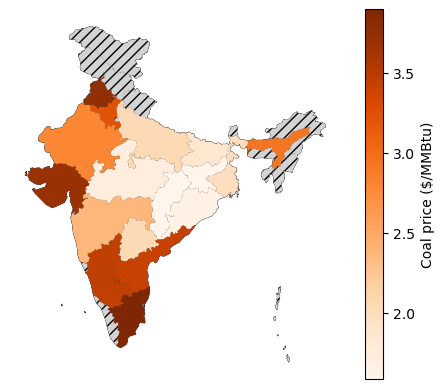

In [4]:
fp = '/Users/yifuding/Desktop/India_project_data/India_shape/india-polygon.shp'
States = gpd.GeoDataFrame.from_file(fp, crs="EPSG:4326")
ax = States.plot(edgecolor='k', color='white', linewidth=0.5)
States = States.set_index('st_nm')

StateLoad = States.join(delivered_cost_of_coal)

print(StateLoad.columns, StateLoad['INR/Mcal'])

ax2 = StateLoad.plot(column = 'INR/Mcal', cmap='Oranges', ax=ax, legend=True, missing_kwds={"color": "lightgrey", "hatch": "///"},
                     legend_kwds={'label': "Coal price ($/MMBtu)"})
plt.axis('off')
plt.savefig('coal_price.png', bbox_inches='tight')
